In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('netflix_titles.csv')
print(df.head())

  show_id                                        description     type  \
0      s1  As her father nears the end of his life, filmm...    Movie   
1      s2  After crossing paths at a party, a Cape Town t...  TV Show   
2      s3  To protect his family from a powerful drug lor...  TV Show   
3      s4  Feuds, flirtations and toilet talk go down amo...  TV Show   
4      s5  In a city of coaching centers known to train I...  TV Show   

                   title         director  \
0   Dick Johnson Is Dead  Kirsten Johnson   
1          Blood & Water              NaN   
2              Ganglands  Julien Leclercq   
3  Jailbirds New Orleans              NaN   
4           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3     

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8807 non-null   object 
 1   description   8805 non-null   object 
 2   type          8807 non-null   object 
 3   title         8807 non-null   object 
 4   director      6172 non-null   object 
 5   cast          7980 non-null   object 
 6   country       7974 non-null   object 
 7   date_added    8795 non-null   object 
 8   release_year  8805 non-null   float64
 9   rating        8801 non-null   object 
 10  duration      8802 non-null   object 
 11  listed_in     8805 non-null   object 
dtypes: float64(1), object(11)
memory usage: 825.8+ KB
None


In [36]:
df.drop(['description','cast','director','date_added','rating','duration'], axis=1, inplace=True)

In [5]:
df.head()

,show_id,type,title,country,release_year,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,2020.0,Documentaries
1,s2,TV Show,Blood & Water,South Africa,2021.0,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,NaN,2021.0,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,2021.0,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,India,2021.0,"International TV Shows, Romantic TV Shows, TV ..."


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8807 non-null   object 
 1   type          8807 non-null   object 
 2   title         8807 non-null   object 
 3   country       7974 non-null   object 
 4   release_year  8805 non-null   float64
 5   listed_in     8805 non-null   object 
dtypes: float64(1), object(5)
memory usage: 413.0+ KB


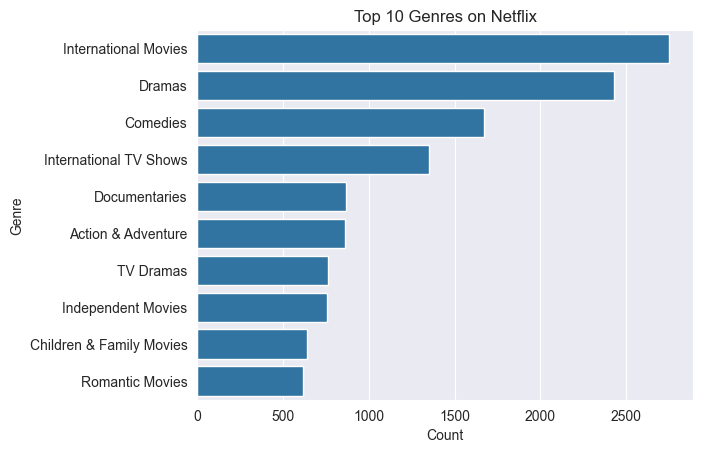

In [50]:
from collections import Counter

all_genres = ','.join(df['listed_in'].dropna()).split(',')
genre_counts = Counter([genre.strip() for genre in all_genres])
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])
# print(top_genres.head())
sns.barplot(x='Count', y='Genre', data=top_genres)
plt.title("Top 10 Genres on Netflix")
plt.show()


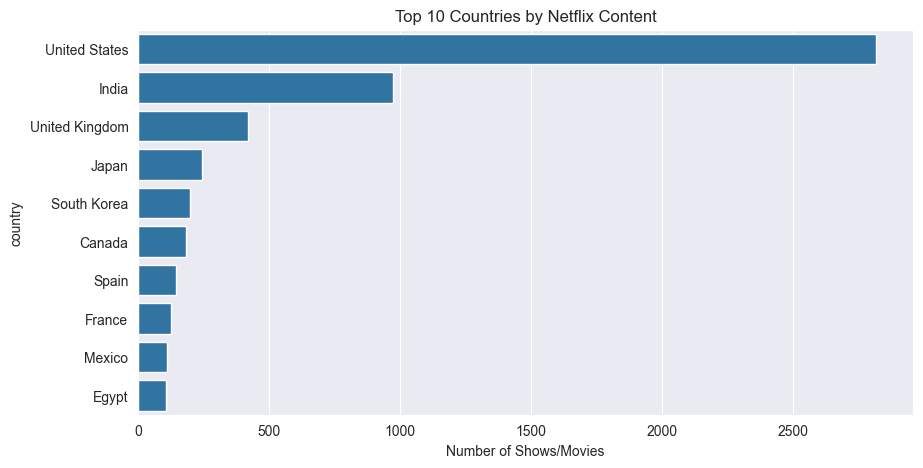

In [16]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Netflix Content")
plt.xlabel("Number of Shows/Movies")
plt.show()


In [19]:
df['release_year'] = pd.to_datetime(df['release_year'])




In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   country       7974 non-null   object        
 4   release_year  8805 non-null   datetime64[ns]
 5   listed_in     8805 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 413.0+ KB


In [13]:
df.head()

,show_id,type,title,country,release_year,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,1970-01-01 00:00:00.000002020,Documentaries
1,s2,TV Show,Blood & Water,South Africa,1970-01-01 00:00:00.000002021,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,NaN,1970-01-01 00:00:00.000002021,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,1970-01-01 00:00:00.000002021,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,India,1970-01-01 00:00:00.000002021,"International TV Shows, Romantic TV Shows, TV ..."


In [23]:
release_counts = df['release_year'].value_counts().sort_index()

# Print the result
print("Movies released per year:\n")
print(release_counts)

Movies released per year:

release_year
1925.0       1
1942.0       2
1943.0       3
1944.0       3
1945.0       4
          ... 
2017.0    1031
2018.0    1147
2019.0    1030
2020.0     953
2021.0     592
Name: count, Length: 74, dtype: int64


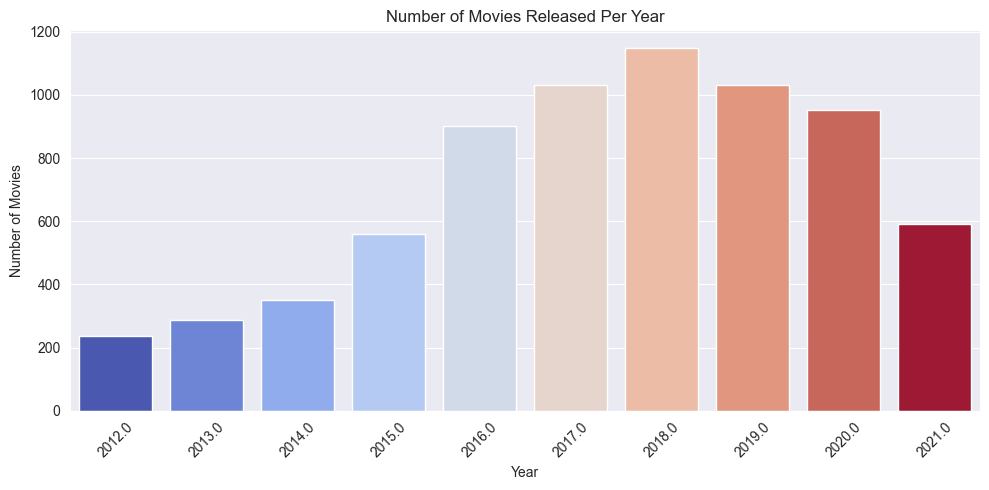

In [33]:
# Count movies per year
release_counts = df['release_year'].value_counts().head(10).sort_index()

plot_df = pd.DataFrame({
    'year': release_counts.index,
    'count': release_counts.values
})


# Plot the bar graph
plt.figure(figsize=(10, 5))
sns.barplot(data=plot_df, x='year', y='count', hue='year', palette='coolwarm', legend=False)

# Add labels and title
plt.title("Number of Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8807 non-null   object 
 1   type          8807 non-null   object 
 2   title         8807 non-null   object 
 3   country       7974 non-null   object 
 4   release_year  8805 non-null   float64
 5   listed_in     8805 non-null   object 
dtypes: float64(1), object(5)
memory usage: 413.0+ KB
None


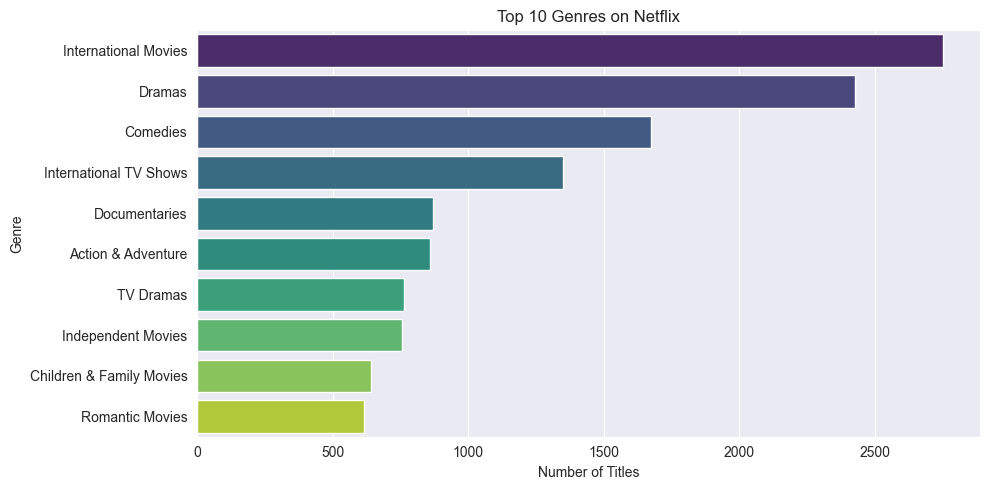

In [54]:
all_genres = ','.join(df['listed_in'].dropna()).split(',')
genre_counts = Counter([genre.strip() for genre in all_genres])

# Top 10 genres
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Genre', data=top_genres, hue='Genre', palette='viridis', legend=False)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()